## Restaurant Inspection Result Prediction

Given *data about restaurants*, let's try to predict whether a given restaurant will be marked with a **critical flag**. 

We will use a logistic regression model to make our predictions. 

Data source: https://www.kaggle.com/datasets/new-york-city/nyc-inspections

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('archive/DOHMH_New_York_City_Restaurant_Inspection_Results.csv')
data

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399913,41004284,CAFE CLASSICO,MANHATTAN,35,WEST 57 STREET,10019.0,2123555411,Jewish/Kosher,01/28/2016,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,19.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
399914,40368318,MAGGIES PLACE,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,02/29/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,A,02/29/2016,08/28/2017,Cycle Inspection / Re-inspection
399915,50051468,Yong Kong Street,MANHATTAN,1000S,8TH AVE,10019.0,9176406083,Japanese,01/05/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,25.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
399916,41555297,RUBY FALLS NIGHTLIFE CAFE,STATEN ISLAND,45,PAGE AVENUE,10309.0,7189849888,American,09/19/2014,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",Not Critical,12.0,A,09/19/2014,08/28/2017,Cycle Inspection / Re-inspection


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399918 entries, 0 to 399917
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  399918 non-null  int64  
 1   DBA                    399559 non-null  object 
 2   BORO                   399918 non-null  object 
 3   BUILDING               399809 non-null  object 
 4   STREET                 399909 non-null  object 
 5   ZIPCODE                399909 non-null  float64
 6   PHONE                  399913 non-null  object 
 7   CUISINE DESCRIPTION    399918 non-null  object 
 8   INSPECTION DATE        399918 non-null  object 
 9   ACTION                 398783 non-null  object 
 10  VIOLATION CODE         393414 non-null  object 
 11  VIOLATION DESCRIPTION  392939 non-null  object 
 12  CRITICAL FLAG          399918 non-null  object 
 13  SCORE                  376704 non-null  float64
 14  GRADE                  195413 non-nu

### Preprocessing

In [4]:
df = data.copy()

In [5]:
# Drop CAMIS and DBA columns
df = df.drop(['CAMIS', 'DBA'], axis=1)

In [6]:
df

,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399913,MANHATTAN,35,WEST 57 STREET,10019.0,2123555411,Jewish/Kosher,01/28/2016,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,19.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
399914,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,02/29/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,A,02/29/2016,08/28/2017,Cycle Inspection / Re-inspection
399915,MANHATTAN,1000S,8TH AVE,10019.0,9176406083,Japanese,01/05/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,25.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
399916,STATEN ISLAND,45,PAGE AVENUE,10309.0,7189849888,American,09/19/2014,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",Not Critical,12.0,A,09/19/2014,08/28/2017,Cycle Inspection / Re-inspection


In [7]:
# Drop unnecessary (duplicate) column
df = df.drop('VIOLATION DESCRIPTION', axis=1)

In [8]:
{column: len(df[column].unique()) for column in df.columns}

{'BORO': 6,
 'BUILDING': 7257,
 'STREET': 3329,
 'ZIPCODE': 234,
 'PHONE': 25166,
 'CUISINE DESCRIPTION': 84,
 'INSPECTION DATE': 1414,
 'ACTION': 6,
 'VIOLATION CODE': 98,
 'CRITICAL FLAG': 3,
 'SCORE': 121,
 'GRADE': 7,
 'GRADE DATE': 1326,
 'RECORD DATE': 1,
 'INSPECTION TYPE': 35}

In [9]:
# Drop single value column
df = df.drop('RECORD DATE', axis=1)

In [10]:
df.columns[df.isna().mean() >= 0.25]

Index(['GRADE', 'GRADE DATE'], dtype='object')

In [11]:
# Drop columns with more than 25% missing values
df = df.drop(df.columns[df.isna().mean() >= 0.25], axis=1)

In [12]:
df

,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,CRITICAL FLAG,SCORE,INSPECTION TYPE
0,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Critical,30.0,Cycle Inspection / Initial Inspection
1,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Not Critical,NaN,Administrative Miscellaneous / Initial Inspection
2,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Not Critical,2.0,Pre-permit (Operational) / Initial Inspection
3,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Critical,46.0,Pre-permit (Operational) / Initial Inspection
4,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Critical,18.0,Cycle Inspection / Initial Inspection
...,...,...,...,...,...,...,...,...,...,...,...,...
399913,MANHATTAN,35,WEST 57 STREET,10019.0,2123555411,Jewish/Kosher,01/28/2016,Violations were cited in the following area(s).,04C,Critical,19.0,Cycle Inspection / Initial Inspection
399914,MANHATTAN,21,EAST 47 STREET,10017.0,2127535757,American,02/29/2016,Violations were cited in the following area(s).,04L,Critical,11.0,Cycle Inspection / Re-inspection
399915,MANHATTAN,1000S,8TH AVE,10019.0,9176406083,Japanese,01/05/2017,Violations were cited in the following area(s).,10B,Not Critical,25.0,Pre-permit (Operational) / Initial Inspection
399916,STATEN ISLAND,45,PAGE AVENUE,10309.0,7189849888,American,09/19/2014,Violations were cited in the following area(s).,10I,Not Critical,12.0,Cycle Inspection / Re-inspection


In [13]:
{column: len(df[column].unique()) for column in df.columns}

{'BORO': 6,
 'BUILDING': 7257,
 'STREET': 3329,
 'ZIPCODE': 234,
 'PHONE': 25166,
 'CUISINE DESCRIPTION': 84,
 'INSPECTION DATE': 1414,
 'ACTION': 6,
 'VIOLATION CODE': 98,
 'CRITICAL FLAG': 3,
 'SCORE': 121,
 'INSPECTION TYPE': 35}

In [14]:
# Drop high-cardinality columns
high_cardinality_columns = ['BUILDING', 'STREET', 'PHONE']
df = df.drop(high_cardinality_columns, axis=1)

In [15]:
df

,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,CRITICAL FLAG,SCORE,INSPECTION TYPE
0,MANHATTAN,10016.0,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Critical,30.0,Cycle Inspection / Initial Inspection
1,MANHATTAN,10016.0,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Not Critical,NaN,Administrative Miscellaneous / Initial Inspection
2,QUEENS,11106.0,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Not Critical,2.0,Pre-permit (Operational) / Initial Inspection
3,STATEN ISLAND,10314.0,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Critical,46.0,Pre-permit (Operational) / Initial Inspection
4,BROOKLYN,11209.0,American,03/30/2017,Violations were cited in the following area(s).,04M,Critical,18.0,Cycle Inspection / Initial Inspection
...,...,...,...,...,...,...,...,...,...
399913,MANHATTAN,10019.0,Jewish/Kosher,01/28/2016,Violations were cited in the following area(s).,04C,Critical,19.0,Cycle Inspection / Initial Inspection
399914,MANHATTAN,10017.0,American,02/29/2016,Violations were cited in the following area(s).,04L,Critical,11.0,Cycle Inspection / Re-inspection
399915,MANHATTAN,10019.0,Japanese,01/05/2017,Violations were cited in the following area(s).,10B,Not Critical,25.0,Pre-permit (Operational) / Initial Inspection
399916,STATEN ISLAND,10309.0,American,09/19/2014,Violations were cited in the following area(s).,10I,Not Critical,12.0,Cycle Inspection / Re-inspection


In [16]:
# Convert ZIPCODE column into a string column
df['ZIPCODE'] = df['ZIPCODE'].astype(str)

In [17]:
{column: len(df[column].unique()) for column in df.columns}

{'BORO': 6,
 'ZIPCODE': 234,
 'CUISINE DESCRIPTION': 84,
 'INSPECTION DATE': 1414,
 'ACTION': 6,
 'VIOLATION CODE': 98,
 'CRITICAL FLAG': 3,
 'SCORE': 121,
 'INSPECTION TYPE': 35}

In [18]:
df.isna().sum()

BORO                       0
ZIPCODE                    0
CUISINE DESCRIPTION        0
INSPECTION DATE            0
ACTION                  1135
VIOLATION CODE          6504
CRITICAL FLAG              0
SCORE                  23214
INSPECTION TYPE         1135
dtype: int64

In [19]:
df['CRITICAL FLAG'].unique()

array(['Critical', 'Not Critical', 'Not Applicable'], dtype=object)

In [20]:
# Drop rows with missing target values
missing_target_rows = df[df['CRITICAL FLAG'] == 'Not Applicable'].index

In [21]:
df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)

In [22]:
df.isna().sum()

BORO                       0
ZIPCODE                    0
CUISINE DESCRIPTION        0
INSPECTION DATE            0
ACTION                     0
VIOLATION CODE             0
CRITICAL FLAG              0
SCORE                  18161
INSPECTION TYPE            0
dtype: int64

In [23]:
{column: len(df[column].unique()) for column in df.columns}

{'BORO': 5,
 'ZIPCODE': 230,
 'CUISINE DESCRIPTION': 84,
 'INSPECTION DATE': 1405,
 'ACTION': 5,
 'VIOLATION CODE': 93,
 'CRITICAL FLAG': 2,
 'SCORE': 121,
 'INSPECTION TYPE': 34}

In [24]:
df

,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,CRITICAL FLAG,SCORE,INSPECTION TYPE
0,MANHATTAN,10016.0,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Critical,30.0,Cycle Inspection / Initial Inspection
1,MANHATTAN,10016.0,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Not Critical,NaN,Administrative Miscellaneous / Initial Inspection
2,QUEENS,11106.0,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Not Critical,2.0,Pre-permit (Operational) / Initial Inspection
3,STATEN ISLAND,10314.0,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Critical,46.0,Pre-permit (Operational) / Initial Inspection
4,BROOKLYN,11209.0,American,03/30/2017,Violations were cited in the following area(s).,04M,Critical,18.0,Cycle Inspection / Initial Inspection
...,...,...,...,...,...,...,...,...,...
392934,MANHATTAN,10019.0,Jewish/Kosher,01/28/2016,Violations were cited in the following area(s).,04C,Critical,19.0,Cycle Inspection / Initial Inspection
392935,MANHATTAN,10017.0,American,02/29/2016,Violations were cited in the following area(s).,04L,Critical,11.0,Cycle Inspection / Re-inspection
392936,MANHATTAN,10019.0,Japanese,01/05/2017,Violations were cited in the following area(s).,10B,Not Critical,25.0,Pre-permit (Operational) / Initial Inspection
392937,STATEN ISLAND,10309.0,American,09/19/2014,Violations were cited in the following area(s).,10I,Not Critical,12.0,Cycle Inspection / Re-inspection


In [25]:
# Fill missing values 
df['SCORE'] = df['SCORE'].fillna(df['SCORE'].mean())

In [26]:
df.isna().sum()

BORO                   0
ZIPCODE                0
CUISINE DESCRIPTION    0
INSPECTION DATE        0
ACTION                 0
VIOLATION CODE         0
CRITICAL FLAG          0
SCORE                  0
INSPECTION TYPE        0
dtype: int64

In [27]:
# Extract date features
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])
df['INSPECTION YEAR'] = df['INSPECTION DATE'].apply(lambda x: x.year)
df['INSPECTION MONTH'] = df['INSPECTION DATE'].apply(lambda x: x.month)
df['INSPECTION DAY'] = df['INSPECTION DATE'].apply(lambda x: x.day)
df = df.drop('INSPECTION DATE', axis=1)

In [28]:
df

,BORO,ZIPCODE,CUISINE DESCRIPTION,ACTION,VIOLATION CODE,CRITICAL FLAG,SCORE,INSPECTION TYPE,INSPECTION YEAR,INSPECTION MONTH,INSPECTION DAY
0,MANHATTAN,10016.0,Italian,Violations were cited in the following area(s).,02B,Critical,30.000000,Cycle Inspection / Initial Inspection,2015,6,15
1,MANHATTAN,10016.0,Italian,Violations were cited in the following area(s).,20F,Not Critical,18.991144,Administrative Miscellaneous / Initial Inspection,2014,11,25
2,QUEENS,11106.0,Italian,Violations were cited in the following area(s).,10F,Not Critical,2.000000,Pre-permit (Operational) / Initial Inspection,2016,10,3
3,STATEN ISLAND,10314.0,Chinese,Violations were cited in the following area(s).,02G,Critical,46.000000,Pre-permit (Operational) / Initial Inspection,2017,5,17
4,BROOKLYN,11209.0,American,Violations were cited in the following area(s).,04M,Critical,18.000000,Cycle Inspection / Initial Inspection,2017,3,30
...,...,...,...,...,...,...,...,...,...,...,...
392934,MANHATTAN,10019.0,Jewish/Kosher,Violations were cited in the following area(s).,04C,Critical,19.000000,Cycle Inspection / Initial Inspection,2016,1,28
392935,MANHATTAN,10017.0,American,Violations were cited in the following area(s).,04L,Critical,11.000000,Cycle Inspection / Re-inspection,2016,2,29
392936,MANHATTAN,10019.0,Japanese,Violations were cited in the following area(s).,10B,Not Critical,25.000000,Pre-permit (Operational) / Initial Inspection,2017,1,5
392937,STATEN ISLAND,10309.0,American,Violations were cited in the following area(s).,10I,Not Critical,12.000000,Cycle Inspection / Re-inspection,2014,9,19


In [29]:
# One-hot encode remaining categorical columns
for column in df.select_dtypes('object').columns.drop('CRITICAL FLAG'):
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)

In [30]:
df

,CRITICAL FLAG,SCORE,INSPECTION YEAR,INSPECTION MONTH,INSPECTION DAY,BORO_BRONX,BORO_BROOKLYN,BORO_MANHATTAN,BORO_QUEENS,BORO_STATEN ISLAND,ZIPCODE_10001.0,ZIPCODE_10002.0,ZIPCODE_10003.0,ZIPCODE_10004.0,ZIPCODE_10005.0,ZIPCODE_10006.0,ZIPCODE_10007.0,ZIPCODE_10009.0,ZIPCODE_10010.0,ZIPCODE_10011.0,ZIPCODE_10012.0,ZIPCODE_10013.0,ZIPCODE_10014.0,ZIPCODE_10016.0,ZIPCODE_10017.0,ZIPCODE_10018.0,ZIPCODE_10019.0,ZIPCODE_10020.0,ZIPCODE_10021.0,ZIPCODE_10022.0,ZIPCODE_10023.0,ZIPCODE_10024.0,ZIPCODE_10025.0,ZIPCODE_10026.0,ZIPCODE_10027.0,ZIPCODE_10028.0,ZIPCODE_10029.0,ZIPCODE_10030.0,ZIPCODE_10031.0,ZIPCODE_10032.0,ZIPCODE_10033.0,ZIPCODE_10034.0,ZIPCODE_10035.0,ZIPCODE_10036.0,ZIPCODE_10037.0,ZIPCODE_10038.0,ZIPCODE_10039.0,ZIPCODE_10040.0,ZIPCODE_10044.0,ZIPCODE_10048.0,ZIPCODE_10055.0,ZIPCODE_10057.0,ZIPCODE_10065.0,ZIPCODE_10069.0,ZIPCODE_10075.0,ZIPCODE_10103.0,ZIPCODE_10104.0,ZIPCODE_10105.0,ZIPCODE_10106.0,ZIPCODE_10107.0,ZIPCODE_10110.0,ZIPCODE_10111.0,ZIPCODE_10112.0,ZIPCODE_10118.0,ZIPCODE_10119.0,ZIPCODE_10121.0,ZIPCODE_10123.0,ZIPCODE_10128.0,ZIPCODE_10152.0,ZIPCODE_10153.0,ZIPCODE_10154.0,ZIPCODE_10155.0,ZIPCODE_10165.0,ZIPCODE_10166.0,ZIPCODE_10167.0,ZIPCODE_10168.0,ZIPCODE_10169.0,ZIPCODE_10170.0,ZIPCODE_10171.0,ZIPCODE_10172.0,ZIPCODE_10173.0,ZIPCODE_10174.0,ZIPCODE_10175.0,ZIPCODE_10176.0,ZIPCODE_10178.0,ZIPCODE_10179.0,ZIPCODE_10199.0,ZIPCODE_10270.0,ZIPCODE_10271.0,ZIPCODE_10279.0,ZIPCODE_10280.0,ZIPCODE_10281.0,ZIPCODE_10282.0,ZIPCODE_10285.0,ZIPCODE_10301.0,ZIPCODE_10302.0,ZIPCODE_10303.0,ZIPCODE_10304.0,ZIPCODE_10305.0,ZIPCODE_10306.0,ZIPCODE_10307.0,ZIPCODE_10308.0,ZIPCODE_10309.0,ZIPCODE_10310.0,ZIPCODE_10311.0,ZIPCODE_10312.0,ZIPCODE_10314.0,ZIPCODE_10317.0,ZIPCODE_10451.0,ZIPCODE_10452.0,ZIPCODE_10453.0,ZIPCODE_10454.0,ZIPCODE_10455.0,ZIPCODE_10456.0,ZIPCODE_10457.0,ZIPCODE_10458.0,ZIPCODE_10459.0,ZIPCODE_10460.0,ZIPCODE_10461.0,ZIPCODE_10462.0,ZIPCODE_10463.0,ZIPCODE_10464.0,ZIPCODE_10465.0,ZIPCODE_10466.0,ZIPCODE_10467.0,ZIPCODE_10468.0,ZIPCODE_10469.0,ZIPCODE_10470.0,ZIPCODE_10471.0,ZIPCODE_10472.0,ZIPCODE_10473.0,ZIPCODE_10474.0,ZIPCODE_10475.0,ZIPCODE_11001.0,ZIPCODE_11004.0,ZIPCODE_11005.0,ZIPCODE_11040.0,ZIPCODE_11101.0,ZIPCODE_11102.0,ZIPCODE_11103.0,ZIPCODE_11104.0,ZIPCODE_11105.0,ZIPCODE_11106.0,ZIPCODE_11109.0,ZIPCODE_11201.0,ZIPCODE_11203.0,ZIPCODE_11204.0,ZIPCODE_11205.0,ZIPCODE_11206.0,ZIPCODE_11207.0,ZIPCODE_11208.0,ZIPCODE_11209.0,ZIPCODE_11210.0,ZIPCODE_11211.0,ZIPCODE_11212.0,ZIPCODE_11213.0,ZIPCODE_11214.0,ZIPCODE_11215.0,ZIPCODE_11216.0,ZIPCODE_11217.0,ZIPCODE_11218.0,ZIPCODE_11219.0,ZIPCODE_11220.0,ZIPCODE_11221.0,ZIPCODE_11222.0,ZIPCODE_11223.0,ZIPCODE_11224.0,ZIPCODE_11225.0,ZIPCODE_11226.0,ZIPCODE_11228.0,ZIPCODE_11229.0,ZIPCODE_11230.0,ZIPCODE_11231.0,ZIPCODE_11232.0,ZIPCODE_11233.0,ZIPCODE_11234.0,ZIPCODE_11235.0,ZIPCODE_11236.0,ZIPCODE_11237.0,ZIPCODE_11238.0,ZIPCODE_11239.0,ZIPCODE_11241.0,ZIPCODE_11242.0,ZIPCODE_11249.0,ZIPCODE_11256.0,ZIPCODE_11352.0,ZIPCODE_11354.0,ZIPCODE_11355.0,ZIPCODE_11356.0,ZIPCODE_11357.0,ZIPCODE_11358.0,ZIPCODE_11360.0,ZIPCODE_11361.0,ZIPCODE_11362.0,ZIPCODE_11363.0,ZIPCODE_11364.0,ZIPCODE_11365.0,ZIPCODE_11366.0,ZIPCODE_11367.0,ZIPCODE_11368.0,ZIPCODE_11369.0,ZIPCODE_11370.0,ZIPCODE_11371.0,ZIPCODE_11372.0,ZIPCODE_11373.0,ZIPCODE_11374.0,ZIPCODE_11375.0,ZIPCODE_11377.0,ZIPCODE_11378.0,ZIPCODE_11379.0,ZIPCODE_11385.0,ZIPCODE_11411.0,ZIPCODE_11412.0,ZIPCODE_11413.0,ZIPCODE_11414.0,ZIPCODE_11415.0,ZIPCODE_11416.0,ZIPCODE_11417.0,ZIPCODE_11418.0,ZIPCODE_11419.0,ZIPCODE_11420.0,ZIPCODE_11421.0,ZIPCODE_11422.0,ZIPCODE_11423.0,ZIPCODE_11426.0,ZIPCODE_11427.0,ZIPCODE_11428.0,ZIPCODE_11429.0,ZIPCODE_11430.0,ZIPCODE_11432.0,ZIPCODE_11433.0,ZIPCODE_11434.0,ZIPCODE_11435.0,ZIPCODE_11436.0,ZIPCODE_11451.0,ZIPCODE_11691.0,ZIPCODE_11692.0,ZIPCODE_11693.0,ZIPCODE_11694.0,ZIPCODE_11697.0,CUISINE DESCRIPTION_Afghan,CUISINE DESCRIPTION_African,CUISINE DESCRIPTION_American,CUISINE DESCRIPTION_Armenian,CUISINE DESCRIPTION_Asian,CUISINE DESCRIPTION_Australian,CUISINE DE

In [32]:
# Split df into X and y
y = df['CRITICAL FLAG'].copy()
X = df.drop('CRITICAL FLAG', axis=1).copy()

In [33]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [34]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [35]:
X_train

,SCORE,INSPECTION YEAR,INSPECTION MONTH,INSPECTION DAY,BORO_BRONX,BORO_BROOKLYN,BORO_MANHATTAN,BORO_QUEENS,BORO_STATEN ISLAND,ZIPCODE_10001.0,ZIPCODE_10002.0,ZIPCODE_10003.0,ZIPCODE_10004.0,ZIPCODE_10005.0,ZIPCODE_10006.0,ZIPCODE_10007.0,ZIPCODE_10009.0,ZIPCODE_10010.0,ZIPCODE_10011.0,ZIPCODE_10012.0,ZIPCODE_10013.0,ZIPCODE_10014.0,ZIPCODE_10016.0,ZIPCODE_10017.0,ZIPCODE_10018.0,ZIPCODE_10019.0,ZIPCODE_10020.0,ZIPCODE_10021.0,ZIPCODE_10022.0,ZIPCODE_10023.0,ZIPCODE_10024.0,ZIPCODE_10025.0,ZIPCODE_10026.0,ZIPCODE_10027.0,ZIPCODE_10028.0,ZIPCODE_10029.0,ZIPCODE_10030.0,ZIPCODE_10031.0,ZIPCODE_10032.0,ZIPCODE_10033.0,ZIPCODE_10034.0,ZIPCODE_10035.0,ZIPCODE_10036.0,ZIPCODE_10037.0,ZIPCODE_10038.0,ZIPCODE_10039.0,ZIPCODE_10040.0,ZIPCODE_10044.0,ZIPCODE_10048.0,ZIPCODE_10055.0,ZIPCODE_10057.0,ZIPCODE_10065.0,ZIPCODE_10069.0,ZIPCODE_10075.0,ZIPCODE_10103.0,ZIPCODE_10104.0,ZIPCODE_10105.0,ZIPCODE_10106.0,ZIPCODE_10107.0,ZIPCODE_10110.0,ZIPCODE_10111.0,ZIPCODE_10112.0,ZIPCODE_10118.0,ZIPCODE_10119.0,ZIPCODE_10121.0,ZIPCODE_10123.0,ZIPCODE_10128.0,ZIPCODE_10152.0,ZIPCODE_10153.0,ZIPCODE_10154.0,ZIPCODE_10155.0,ZIPCODE_10165.0,ZIPCODE_10166.0,ZIPCODE_10167.0,ZIPCODE_10168.0,ZIPCODE_10169.0,ZIPCODE_10170.0,ZIPCODE_10171.0,ZIPCODE_10172.0,ZIPCODE_10173.0,ZIPCODE_10174.0,ZIPCODE_10175.0,ZIPCODE_10176.0,ZIPCODE_10178.0,ZIPCODE_10179.0,ZIPCODE_10199.0,ZIPCODE_10270.0,ZIPCODE_10271.0,ZIPCODE_10279.0,ZIPCODE_10280.0,ZIPCODE_10281.0,ZIPCODE_10282.0,ZIPCODE_10285.0,ZIPCODE_10301.0,ZIPCODE_10302.0,ZIPCODE_10303.0,ZIPCODE_10304.0,ZIPCODE_10305.0,ZIPCODE_10306.0,ZIPCODE_10307.0,ZIPCODE_10308.0,ZIPCODE_10309.0,ZIPCODE_10310.0,ZIPCODE_10311.0,ZIPCODE_10312.0,ZIPCODE_10314.0,ZIPCODE_10317.0,ZIPCODE_10451.0,ZIPCODE_10452.0,ZIPCODE_10453.0,ZIPCODE_10454.0,ZIPCODE_10455.0,ZIPCODE_10456.0,ZIPCODE_10457.0,ZIPCODE_10458.0,ZIPCODE_10459.0,ZIPCODE_10460.0,ZIPCODE_10461.0,ZIPCODE_10462.0,ZIPCODE_10463.0,ZIPCODE_10464.0,ZIPCODE_10465.0,ZIPCODE_10466.0,ZIPCODE_10467.0,ZIPCODE_10468.0,ZIPCODE_10469.0,ZIPCODE_10470.0,ZIPCODE_10471.0,ZIPCODE_10472.0,ZIPCODE_10473.0,ZIPCODE_10474.0,ZIPCODE_10475.0,ZIPCODE_11001.0,ZIPCODE_11004.0,ZIPCODE_11005.0,ZIPCODE_11040.0,ZIPCODE_11101.0,ZIPCODE_11102.0,ZIPCODE_11103.0,ZIPCODE_11104.0,ZIPCODE_11105.0,ZIPCODE_11106.0,ZIPCODE_11109.0,ZIPCODE_11201.0,ZIPCODE_11203.0,ZIPCODE_11204.0,ZIPCODE_11205.0,ZIPCODE_11206.0,ZIPCODE_11207.0,ZIPCODE_11208.0,ZIPCODE_11209.0,ZIPCODE_11210.0,ZIPCODE_11211.0,ZIPCODE_11212.0,ZIPCODE_11213.0,ZIPCODE_11214.0,ZIPCODE_11215.0,ZIPCODE_11216.0,ZIPCODE_11217.0,ZIPCODE_11218.0,ZIPCODE_11219.0,ZIPCODE_11220.0,ZIPCODE_11221.0,ZIPCODE_11222.0,ZIPCODE_11223.0,ZIPCODE_11224.0,ZIPCODE_11225.0,ZIPCODE_11226.0,ZIPCODE_11228.0,ZIPCODE_11229.0,ZIPCODE_11230.0,ZIPCODE_11231.0,ZIPCODE_11232.0,ZIPCODE_11233.0,ZIPCODE_11234.0,ZIPCODE_11235.0,ZIPCODE_11236.0,ZIPCODE_11237.0,ZIPCODE_11238.0,ZIPCODE_11239.0,ZIPCODE_11241.0,ZIPCODE_11242.0,ZIPCODE_11249.0,ZIPCODE_11256.0,ZIPCODE_11352.0,ZIPCODE_11354.0,ZIPCODE_11355.0,ZIPCODE_11356.0,ZIPCODE_11357.0,ZIPCODE_11358.0,ZIPCODE_11360.0,ZIPCODE_11361.0,ZIPCODE_11362.0,ZIPCODE_11363.0,ZIPCODE_11364.0,ZIPCODE_11365.0,ZIPCODE_11366.0,ZIPCODE_11367.0,ZIPCODE_11368.0,ZIPCODE_11369.0,ZIPCODE_11370.0,ZIPCODE_11371.0,ZIPCODE_11372.0,ZIPCODE_11373.0,ZIPCODE_11374.0,ZIPCODE_11375.0,ZIPCODE_11377.0,ZIPCODE_11378.0,ZIPCODE_11379.0,ZIPCODE_11385.0,ZIPCODE_11411.0,ZIPCODE_11412.0,ZIPCODE_11413.0,ZIPCODE_11414.0,ZIPCODE_11415.0,ZIPCODE_11416.0,ZIPCODE_11417.0,ZIPCODE_11418.0,ZIPCODE_11419.0,ZIPCODE_11420.0,ZIPCODE_11421.0,ZIPCODE_11422.0,ZIPCODE_11423.0,ZIPCODE_11426.0,ZIPCODE_11427.0,ZIPCODE_11428.0,ZIPCODE_11429.0,ZIPCODE_11430.0,ZIPCODE_11432.0,ZIPCODE_11433.0,ZIPCODE_11434.0,ZIPCODE_11435.0,ZIPCODE_11436.0,ZIPCODE_11451.0,ZIPCODE_11691.0,ZIPCODE_11692.0,ZIPCODE_11693.0,ZIPCODE_11694.0,ZIPCODE_11697.0,CUISINE DESCRIPTION_Afghan,CUISINE DESCRIPTION_African,CUISINE DESCRIPTION_American,CUISINE DESCRIPTION_Armenian,CUISINE DESCRIPTION_Asian,CUISINE DESCRIPTION_Australian,CUISINE DESCRIPTION_Bage

### Training

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
y_train.unique()

array(['Not Critical', 'Critical'], dtype=object)

### Results

In [38]:
acc = model.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(acc*100))

Test Accuracy: 100.00%


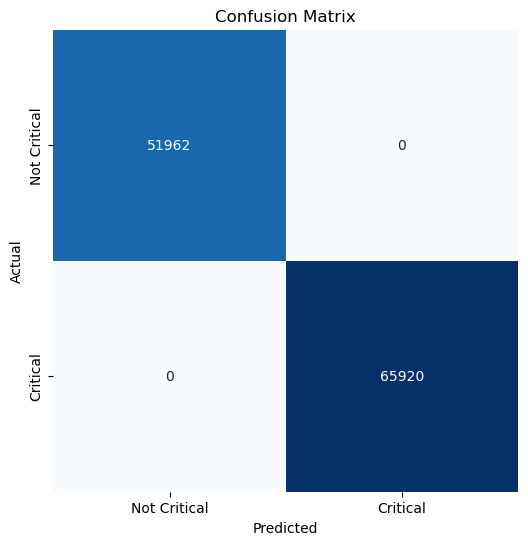

Classification Report:
----------------------------------
               precision    recall  f1-score   support

Not Critical       1.00      1.00      1.00     51962
    Critical       1.00      1.00      1.00     65920

    accuracy                           1.00    117882
   macro avg       1.00      1.00      1.00    117882
weighted avg       1.00      1.00      1.00    117882



In [39]:
# Confusion matrix and classification report
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=['Not Critical', 'Critical'])
clr = classification_report(y_test, y_pred, labels=['Not Critical', 'Critical'])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=['Not Critical', 'Critical'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Critical', 'Critical'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------------------\n", clr)

### Feature Importance

In [43]:
X_train.columns[np.argmax(model.coef_)]

'VIOLATION CODE_10F'

In [44]:
# Use weights of the model to see the most important features
most_important_feature = np.argmax(model.coef_)
X_train.columns[most_important_feature]

'VIOLATION CODE_10F'

In [52]:
data.query("`VIOLATION CODE` == '10F'")['VIOLATION DESCRIPTION'].values[0]

'Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.'

In [54]:
# Check the description associated with this violation code
code_description = data.query("`VIOLATION CODE` == '10F'")['VIOLATION DESCRIPTION'].values[0]

print("CODE 10F:\n=================\n" + code_description)

CODE 10F:
Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.
